In [2]:
%matplotlib inline
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from sklearn import mixture

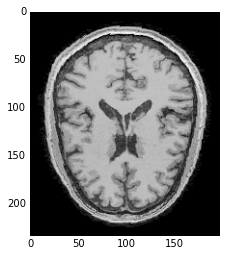

In [55]:
imagefilename1 = "C:\\test_slice.nii.gz" 
# Read the Image
image = sitk.ReadImage(imagefilename1)
image = sitk.Cast(image, sitk.sitkFloat32 )
image = sitk.RescaleIntensity(image,0.0,512)
image_data = sitk.GetArrayFromImage(image);
plt.imshow(image_data[0,:,:],cmap = 'gray')
plt.show()

(1L, 233L, 197L)


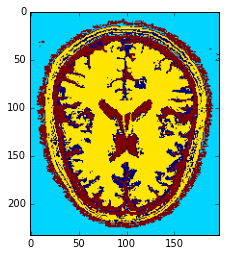

In [56]:
np.random.seed(1)
g = mixture.GMM(n_components=4, covariance_type='diag', tol=0.01, n_iter=100,n_init=1, params='wmc', init_params='wmc')
flatData = image_data.flatten()
print image_data.shape
# GMM expects the data to be in columns. np.newaxis is one way to do this.
#Refer the Appendix at the end for more details.
g.fit(flatData[:,np.newaxis]) 
label_data = g.predict(flatData[:,np.newaxis]) 
label_data = label_data.reshape(image_data.shape)
plt.imshow(label_data[0,:,:])
plt.show()
    

(4L, 1L)


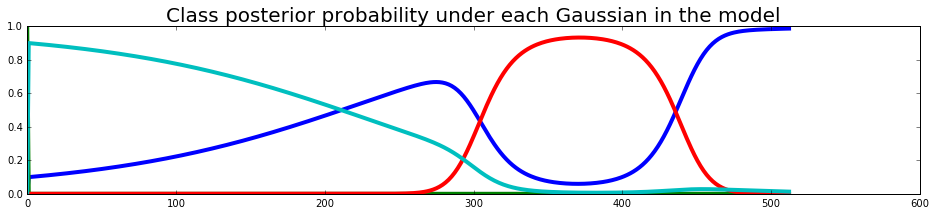

In [60]:
x = np.linspace(0,512,500)
plt.figure(figsize=(16, 3), dpi=100)
print g.means_.shape
plt.plot(x,g.predict_proba(x[:,np.newaxis]), linewidth=4)
plt.title('Class posterior probability under each Gaussian in the model',fontsize=20)
plt.show()

In [7]:
#Example of using np.newaxis
x1 = np.array([1,2,3,4])
print x1.shape
print x1
print x1[:,np.newaxis].shape
print x1[:,np.newaxis]

(4L,)
[1 2 3 4]
(4L, 1L)
[[1]
 [2]
 [3]
 [4]]
